# Pregled in analiza najbolj popularnih pesmi leta 2018
Kot vsakodnevni uživalec in ustvarjalec tako popularne kot manj popularne glasbe sem bil skorajda primoran poskušati poiskati pot do popolnega univerzalnega recepta za hit pesem leta 2018. Recepta, ki do sedaj še ni bil najden. Ali bo še naprej ostal skrit?
Seveda, ker se osnovno znanje programiranja in nekaj podatkov, ki jih ponuja https://www.billboard.com/, ni izkazalo dovolj za odkritje takšne magnitude. Morda svet ni bil pripravljen. Vseeno sem se trudil z iskanjem povezav med popularnostjo pesmi (najvišje mesto, ki ga je dosegla na lestvici, število tednov bivanja pesmi na lestvici, ipd.) in nekaterimi ostalimi podatki o pesmi, ki sem jih uspel izluščiti (število črk oz. besed v naslovu, število izvajalcev pesmi).

In [277]:
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 20
pesmi = pd.read_csv('videne.csv',index_col = 'id').drop(columns = 'mesto_na_lestvici')
pesmi['feats'] = 1 + pesmi['ime_izvajalca'].str.count('Featuring') + pesmi['ime_izvajalca'].str.count(',') + pesmi['ime_izvajalca'].str.count('&')
pesmi['wrdz'] = 1 + pesmi['naslov_pesmi'].str.count(' ')
pesmi['ltrz'] = pesmi['naslov_pesmi'].str.len()

grpd = pesmi.groupby('ime_izvajalca').size().to_frame('vseh_od_izv')
tabela = pd.merge(pesmi, grpd, on='ime_izvajalca')

# Splošne opazke
Na Billboardovi strani lahko za vsak teden od začetka avgusta leta 1958 najdemo lestvico 100 najpopularnejših pesmi tistega tedna. Mene je zanimalo le 52 tednov, ki so imeli kakšen dan leta 2018. Tega leta se je na lestvicah zvrstilo le 704 pesmi, kar ne pomeni niti dveh novih pesmi na dan. Osem parov različnih pesmi je imelo enak naslov, kar tri pesmi pa so bile naslovljene 'Friends', kar smatram kot opomnik kako pomembni so prijatelji.
Našel sem tudi nekaj starejših pesmi, med drugim 'Thriller' iz leta 1982 ter, zahvaljujoč slavi istoimenskega filma, tudi 'Bohemian Rhapsody'.

In [278]:
pesmi

,ime_izvajalca,naslov_pesmi,tednov_na_lestvici,najvišje_mesto,tednov,povp_mesto,feats,wrdz,ltrz
id,,,,,,,,,
0,Ed Sheeran,Perfect,57,1,40,12.000000,1,1,7
1,Post Malone Featuring 21 Savage,Rockstar,41,1,27,15.370370,2,1,8
2,Camila Cabello Featuring Young Thug,Havana,46,2,27,14.555556,2,1,6
3,G-Eazy Featuring A$AP Rocky & Cardi B,No Limit,29,4,14,21.285714,3,2,8
4,Imagine Dragons,Thunder,52,4,18,18.111111,1,1,7
...,...,...,...,...,...,...,...,...,...
699,Kodak Black,Testimony,1,74,1,74.000000,1,1,9
700,Ava Max,Sweet But Psycho,1,87,1,87.000000,1,3,16
701,Kodak Black Featuring Lil Pump,Gnarly,1,88,1,88.000000,2,1,6


In [280]:
tabela.sort_values('vseh_od_izv')

,ime_izvajalca,naslov_pesmi,tednov_na_lestvici,najvišje_mesto,tednov,povp_mesto,feats,wrdz,ltrz,vseh_od_izv
351,Swae Lee Featuring Slim Jxmmi,Guatemala,1,84,1,84.000000,2,1,9,1
445,KIDS SEE GHOSTS Featuring Louis Prima,4th Dimension,1,42,1,42.000000,2,2,13,1
438,Becky G + Natti Natasha,Sin Pijama,12,99,12,89.333333,1,2,10,1
437,Weezer,Africa,15,89,15,68.400000,1,1,6,1
436,Gorillaz Featuring George Benson,Humility,1,85,1,85.000000,2,1,8,1
...,...,...,...,...,...,...,...,...,...,...
210,Drake,8 Out Of 10,3,21,3,59.333333,1,4,11,23
209,Drake,Can't Take A Joke,4,18,4,56.000000,1,4,17,23
208,Drake,Survival,2,17,2,43.000000,1,1,8,23
206,Drake,Mob Ties,8,13,8,61.125000,1,2,8,23


In [274]:
tabela.groupby('ime_izvajalca').size().sort_values()

ime_izvajalca
2 Chainz Featuring YG & Offset     1
Meek Mill Featuring Cardi B        1
Meek Mill Featuring 21 Savage      1
Mason Ramsey                       1
Martin Garrix Featuring Khalid     1
                                  ..
Lil Wayne                         13
Post Malone                       14
XXXTENTACION                      17
Travis Scott                      17
Drake                             23
Length: 447, dtype: int64

<AxesSubplot:xlabel='vseh_od_izv', ylabel='tednov_na_lestvici'>

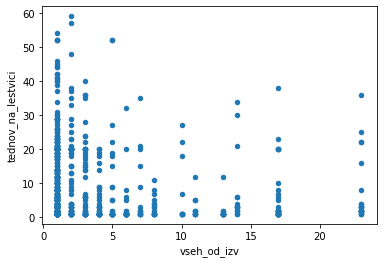

In [271]:
tabela.plot(x='vseh_od_izv',y='tednov_na_lestvici',kind='scatter')

# Vpliv števila črk oz. besed v naslovu pesmi

<AxesSubplot:xlabel='wrdz'>

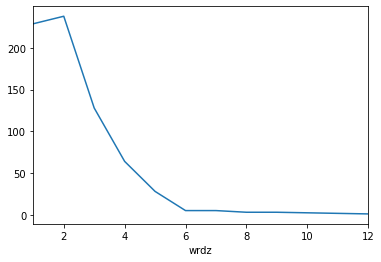

In [282]:
pesmi.groupby('wrdz').size().plot()

<AxesSubplot:xlabel='ltrz'>

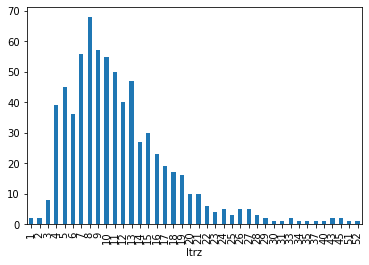

In [285]:
pesmi.groupby('ltrz').size().plot.bar()

<AxesSubplot:xlabel='ltrz', ylabel='tednov_na_lestvici'>

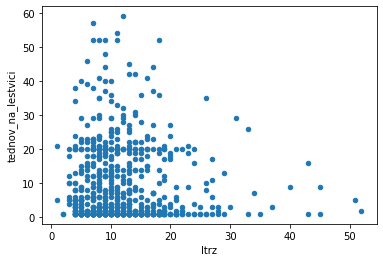

In [195]:
pesmi.plot(x='ltrz',y='tednov_na_lestvici',kind='scatter')

<AxesSubplot:xlabel='wrdz'>

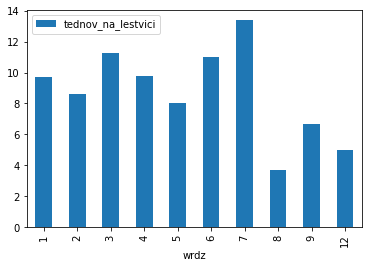

In [290]:
pesmi.groupby('wrdz').mean().plot(y='tednov_na_lestvici',kind='bar')

In [171]:
pesmi.groupby('ime_izvajalca').agg({'tednov_na_lestvici':[max,sum],'najvišje_mesto':min})

tednov_na_lestvici     najvišje_mesto
                                              max sum            min
ime_izvajalca                                                       
2 Chainz Featuring YG & Offset                  2   2             96
2 Chainz, Drake & Quavo                         2   2             53
21 Savage                                      29  29             12
5 Seconds Of Summer                            29  30             61
6LACK Featuring J. Cole                         1   1             76
...                                           ...  ..            ...
Zedd & Elley Duhe                               1   1             90
Zedd, Maren Morris & Grey                      40  40             23
benny blanco, Halsey & Khalid                  23  23             56
lovelytheband                                  22  22             84
twenty one pilots                               4   7             60

[447 rows x 3 columns]

# Vpliv števila izvajalcev pesmi

<AxesSubplot:xlabel='feats'>

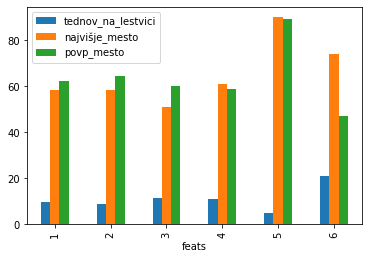

In [301]:
pesmi.groupby('feats').mean().plot(y=['tednov_na_lestvici','najvišje_mesto','povp_mesto'],kind='bar')

<AxesSubplot:xlabel='feats'>

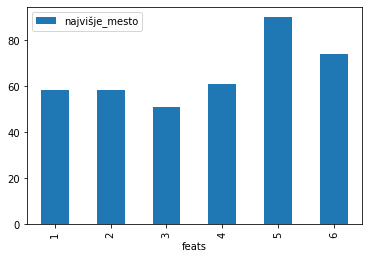

In [294]:
pesmi.groupby('feats').mean().plot(y='najvišje_mesto', kind='bar')

<AxesSubplot:xlabel='feats'>

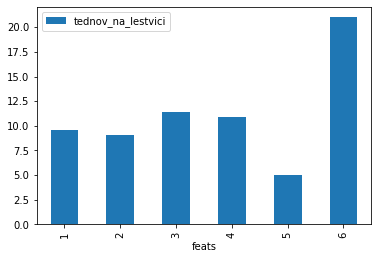

In [199]:
pesmi.groupby('feats').mean().plot(y='tednov_na_lestvici', kind='bar')

<AxesSubplot:xlabel='feats', ylabel='najvišje_mesto'>

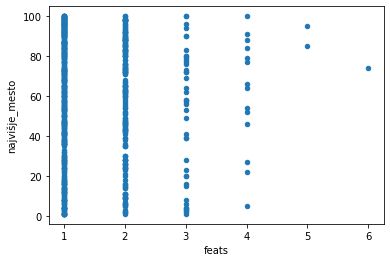

In [299]:
pesmi.plot(x='feats',y='najvišje_mesto',kind='scatter')

<AxesSubplot:xlabel='najvišje_mesto', ylabel='tednov_na_lestvici'>

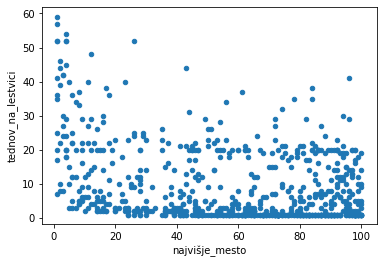

In [300]:
pesmi.plot(x='najvišje_mesto', y='tednov_na_lestvici', kind= 'scatter')

<AxesSubplot:xlabel='povp_mesto', ylabel='najvišje_mesto'>

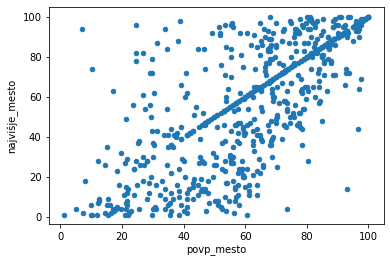

In [151]:
pesmi.plot(x='povp_mesto', y='najvišje_mesto', kind= 'scatter')

<AxesSubplot:xlabel='feats'>

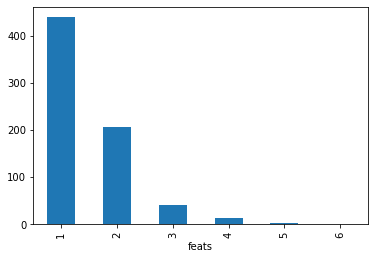

In [295]:
pesmi.groupby('feats').size().plot.bar()

<AxesSubplot:xlabel='wrdz'>

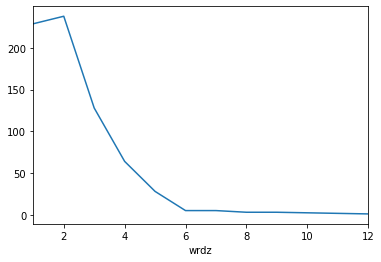

In [210]:
pesmi.groupby('wrdz').size().plot()

<AxesSubplot:xlabel='wrdz'>

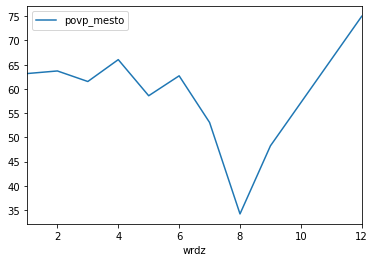

In [211]:
pesmi.groupby('wrdz').mean().plot(y='povp_mesto')

In [225]:
pesmi.groupby('naslov_pesmi').size().sort_values()

naslov_pesmi
(There's No Place Like) Home For The Holidays    1
Overnight                                        1
Paramedic!                                       1
Paranoid                                         1
Pass Out                                         1
                                                ..
Ocean                                            2
Finesse                                          2
Intro                                            2
Kamikaze                                         2
Friends                                          3
Length: 694, dtype: int64